In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Reading the Train and Test files

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Checking the columns with empty Values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Plooting the relationship of Survival vs some variables

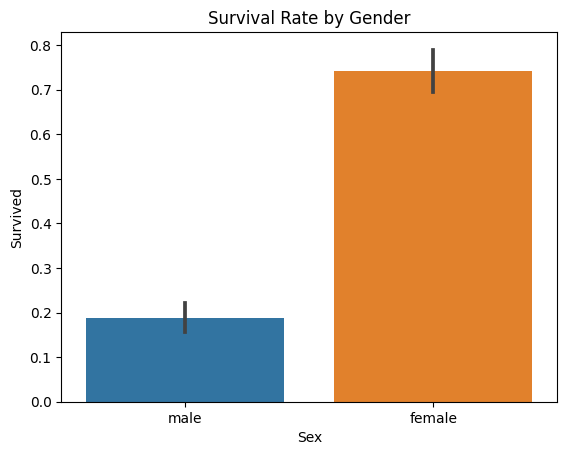

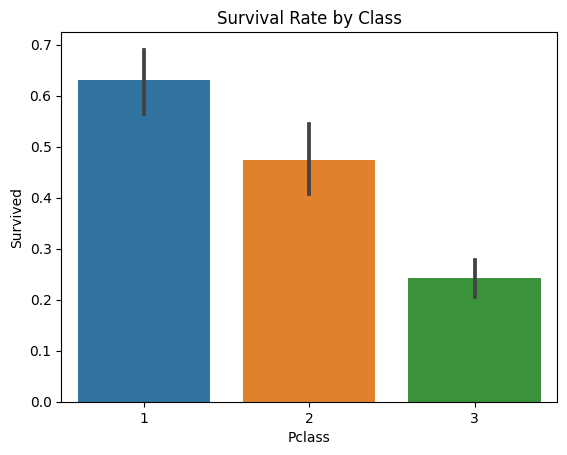

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()


# Filling the missing values of in the dataset

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

/tmp/ipykernel_30/3051220898.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_30/3051220898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Droping unnecessary columns from the data

In [13]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

test_df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)  

# Feature engineering
## Adding new features

In [14]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Categorize Age
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 80], labels=['Child', 'Teen', 'Adult', 'Senior'])


# Create FamilySize feature
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Categorize Age
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 60, 80], labels=['Child', 'Teen', 'Adult', 'Senior'])



In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,2,Adult
1,1,1,female,38.0,1,0,71.2833,C,2,Adult
2,1,3,female,26.0,0,0,7.9250,S,1,Adult
3,1,1,female,35.0,1,0,53.1000,S,2,Adult
4,0,3,male,35.0,0,0,8.0500,S,1,Adult


## Encoding categorical variables

In [17]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'AgeGroup'], drop_first=True)

test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'AgeGroup'], drop_first=True)


In [18]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,0,3,22.0,1,0,7.2500,2,True,False,True,False,True,False
1,1,1,38.0,1,0,71.2833,2,False,False,False,False,True,False
2,1,3,26.0,0,0,7.9250,1,False,False,True,False,True,False
3,1,1,35.0,1,0,53.1000,2,False,False,True,False,True,False
4,0,3,35.0,0,0,8.0500,1,True,False,True,False,True,False


# Standardizing features with larger values

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

test_df[['Age', 'Fare']] = scaler.fit_transform(test_df[['Age', 'Fare']])


In [20]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,418.000000,418.000000,4.180000e+02,418.000000,418.000000,4.180000e+02,418.000000
mean,1100.500000,2.265550,5.524555e-17,0.447368,0.392344,-1.806104e-17,1.839713
std,120.810458,0.841838,1.001198e+00,0.896760,0.981429,1.001198e+00,1.519072
min,892.000000,1.000000,-2.319355e+00,0.000000,0.000000,-6.387815e-01,1.000000
25%,996.250000,1.000000,-5.200968e-01,0.000000,0.000000,-4.972129e-01,1.000000
50%,1100.500000,3.000000,-2.048523e-01,0.000000,0.000000,-3.796234e-01,1.000000
75%,1204.750000,3.000000,4.847449e-01,1.000000,0.000000,-7.399887e-02,2.000000
max,1309.000000,3.000000,3.656893e+00,8.000000,9.000000,8.547081e+00,11.000000


# Initializing the model

In [21]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
# logistic_model = LogisticRegression()
# random_forest_model = RandomForestClassifier()
xgb_model = XGBClassifier()


In [22]:
X_train = df.drop('Survived', axis=1)
y_train = df['Survived']

X_test = test_df

In [23]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,3,-0.565736,1,0,-0.502445,2,True,False,True,False,True,False
1,1,0.663861,1,0,0.786845,2,False,False,False,False,True,False
2,3,-0.258337,0,0,-0.488854,1,False,False,True,False,True,False
3,1,0.433312,1,0,0.420730,2,False,False,True,False,True,False
4,3,0.433312,0,0,-0.486337,1,True,False,True,False,True,False


In [24]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,892,3,0.386231,0,0,-0.498407,1,True,True,False,False,True,False
1,893,3,1.371370,1,0,-0.513274,2,False,False,True,False,True,False
2,894,2,2.553537,0,0,-0.465088,1,True,True,False,False,False,True
3,895,3,-0.204852,0,0,-0.483466,1,True,False,True,False,True,False
4,896,3,-0.598908,1,1,-0.418471,3,False,False,True,False,True,False


# Fitting the training data on the model

In [25]:
# # Logistic Regression
# logistic_model.fit(X_train, y_train)

# # Random Forest
# random_forest_model.fit(X_train, y_train)

# XGBoost
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Predicting the ouput 

In [32]:
X_test = X_test.drop('PassengerId', axis=1)
X_test.head()


,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,3,0.386231,0,0,-0.498407,1,True,True,False,False,True,False
1,3,1.371370,1,0,-0.513274,2,False,False,True,False,True,False
2,2,2.553537,0,0,-0.465088,1,True,True,False,False,False,True
3,3,-0.204852,0,0,-0.483466,1,True,False,True,False,True,False
4,3,-0.598908,1,1,-0.418471,3,False,False,True,False,True,False


In [33]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,892,3,0.386231,0,0,-0.498407,1,True,True,False,False,True,False
1,893,3,1.371370,1,0,-0.513274,2,False,False,True,False,True,False
2,894,2,2.553537,0,0,-0.465088,1,True,True,False,False,False,True
3,895,3,-0.204852,0,0,-0.483466,1,True,False,True,False,True,False
4,896,3,-0.598908,1,1,-0.418471,3,False,False,True,False,True,False


In [34]:
from sklearn.metrics import accuracy_score

# Logistic Regression
# logistic_preds = logistic_model.predict(X_test)
# print(logistic_preds)

# # Random Forest
# rf_preds = random_forest_model.predict(X_test)

# # XGBoost
xgb_preds = xgb_model.predict(X_test)
print(xgb_preds)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1
 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [40]:
# Create a DataFrame
data = {'PassengerId': test_df['PassengerId'].tolist(), 'Survived': xgb_preds.tolist()}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = 'passenger_survivors.csv'
df.to_csv(csv_filename, index=False)
